In [5]:
    MTMP (Mean Temperature): 0.45
    WSM1 (Wind Speed Measurement 1): 0.38
    WSM2 (Wind Speed Measurement 2): 0.33
    WSM3 (Wind Speed Measurement 3): 0.31
    WSM4 (Wind Speed Measurement 4): 0.27

NameError: name 'correlation_matrix' is not defined

<Figure size 1200x1000 with 0 Axes>

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 31.6876 - val_loss: 1.5347
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.1831 - val_loss: 1.5489
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2435 - val_loss: 1.6165
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.7383 - val_loss: 1.7370
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.1455 - val_loss: 1.8471
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.0073 - val_loss: 1.9869
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.2637 - val_loss: 2.1195
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.7733 - val_loss: 2.3422
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.5500 - val_loss: 2.4443
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.1413 - val_loss: 2.4583
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.7766 - val_loss: 2.3825
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.

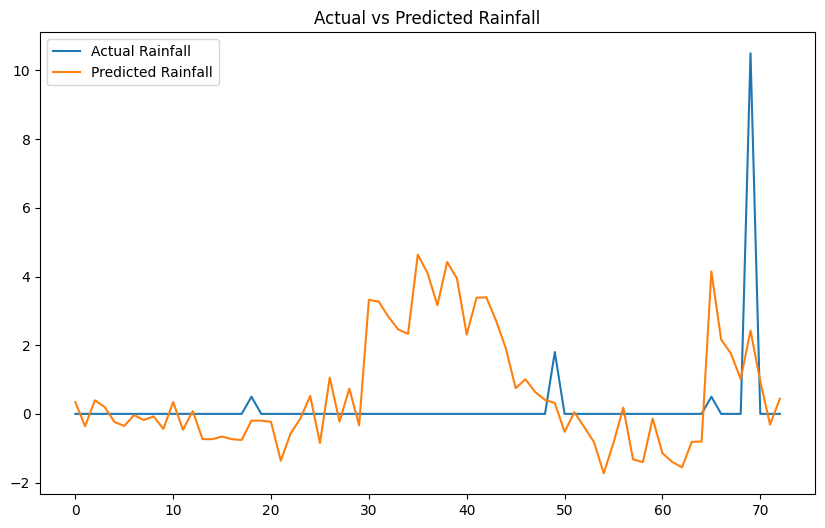

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Step 1: Load the dataset
data = pd.read_csv('AGRA.csv')

# Step 2: Data inspection
# Rename 'Date' column to 'Day' to avoid confusion with the 'datetime' feature
data.rename(columns={'Date': 'Day'}, inplace=True)

# Step 3: Preprocessing
# Combine Year, Month, and Day columns to create a 'datetime' feature
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Select relevant features for the RNN
features = ['Year', 'Month', 'Day', 'EVP', 'ET', 'MAX', 'MIN', 'MTMP', 'WSM1', 'WSM2', 'WSM3', 'WSM4', 'RH1', 'RH2']
X = data[features]
y = data['RF']  # Target: Rainfall (RF)

# Step 4: Scale the features (RNNs perform better with normalized data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data to 3D for RNN input (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Step 5: Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Step 8: Make predictions on the test data
y_pred = model.predict(X_test)

# Optionally, you can plot the predictions vs actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Rainfall')
plt.plot(y_pred, label='Predicted Rainfall')
plt.legend()
plt.title('Actual vs Predicted Rainfall')
plt.show()


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 48.3262 - val_loss: 1.5276
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.9302 - val_loss: 1.5248
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1380 - val_loss: 1.5317
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.3346 - val_loss: 1.5428
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.6948 - val_loss: 1.5589
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.9249 - val_loss: 1.5795
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.5784 - val_loss: 1.6064
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7933 
Test Loss: 1.5248157978057861
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


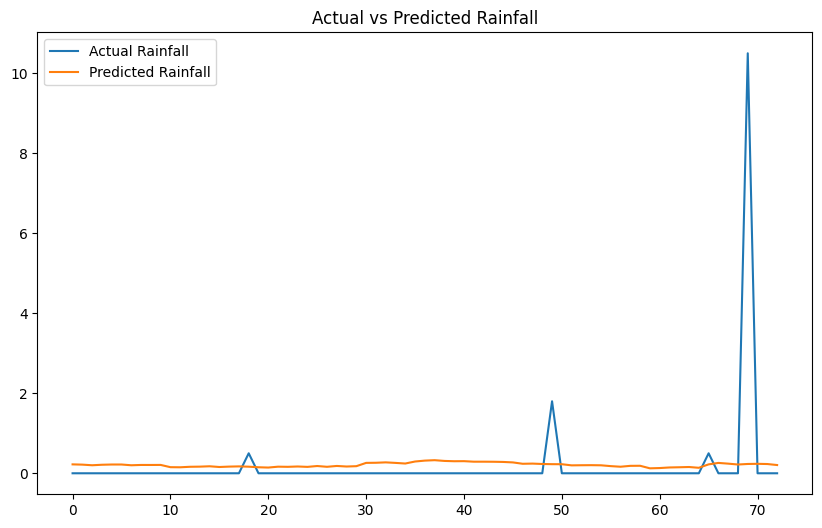

In [14]:
from tensorflow.keras.layers import Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Step 5: Define the updated RNN model with LSTM and Dropout
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add Dropout to prevent overfitting
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping to stop training when validation loss stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Step 7: Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Step 8: Make predictions on the test data
y_pred = model.predict(X_test)

# Plot predictions vs actuals
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Rainfall')
plt.plot(y_pred, label='Predicted Rainfall')
plt.legend()
plt.title('Actual vs Predicted Rainfall')
plt.show()


Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0149 - val_loss: 0.0012
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094 - val_loss: 0.0017
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - val_loss: 0.0012
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0077 - val_loss: 0.0017
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0127 - val_loss: 0.0013
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0134 - val_loss: 0.0010
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0106 - val_loss: 0.0022
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0150 - val_loss: 0.0010
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0072 - val_loss: 0.0024
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - val_loss: 0.0014
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - val_loss: 0.0021
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0096 - val_l

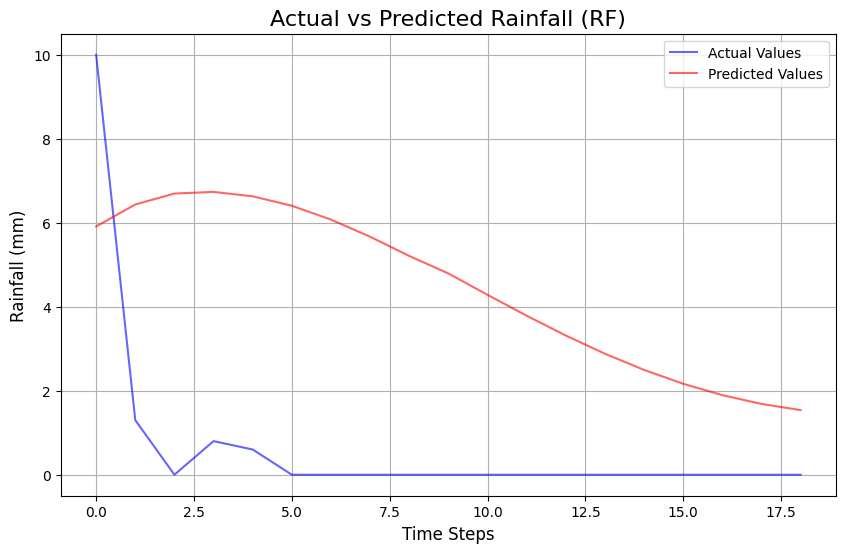

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create sequences for LSTM
def create_sequences(data, time_steps):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i: i + time_steps])
        labels.append(data[i + time_steps])
    return np.array(sequences), np.array(labels)

# Prepare the dataset for LSTM
def prepare_data(df, time_steps=30, test_size=0.05):
    # Extract only 'RF' column (Rainfall data)
    rf_data = df[['RF']].values
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    rf_data_scaled = scaler.fit_transform(rf_data)
    
    # Create sequences for LSTM
    X, y = create_sequences(rf_data_scaled, time_steps)
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    return X_train, y_train, X_test, y_test, scaler

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer for RF prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Process a single file
def process_single_file(file_path, time_steps=30, test_size=0.05):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Prepare the data (5% as test, 30 time-steps)
    X_train, y_train, X_test, y_test, scaler = prepare_data(df, time_steps, test_size)
    
    # Build the LSTM model
    model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    
    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Inverse transform the predictions and actual data to the original scale
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate Mean Squared Error
    mse = np.mean((predictions_rescaled - y_test_rescaled)**2)
    
    # Calculate percentage error, avoiding division by zero
    non_zero_indices = y_test_rescaled != 0
    if len(non_zero_indices) > 0:
        percentage_errors = np.abs((y_test_rescaled[non_zero_indices] - predictions_rescaled[non_zero_indices]) / y_test_rescaled[non_zero_indices]) * 100
        mean_percentage_error = np.mean(percentage_errors)
    else:
        mean_percentage_error = np.nan  # Handle case where all values are zero
    
    # Print results
    print(f"File: {file_path}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
    
    # Plot Actual vs Predicted
    plot_actual_vs_predicted(y_test_rescaled, predictions_rescaled)

# Function to plot Actual vs Predicted values
def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label="Actual Values", color='blue', alpha=0.6)
    plt.plot(predicted, label="Predicted Values", color='red', alpha=0.6)
    plt.title('Actual vs Predicted Rainfall (RF)', fontsize=16)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Main entry point
if __name__ == "__main__":
    file_path = 'JORHAT.csv'  # Path to the single file
    process_single_file(file_path)


Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0099 - val_loss: 6.1481e-05
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0045 - val_loss: 1.4702e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - val_loss: 6.2842e-08
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0020 - val_loss: 1.0275e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019 - val_loss: 5.7159e-05
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012 - val_loss: 3.1457e-05
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0044 - val_loss: 1.9070e-04
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0031 - val_loss: 1.6458e-06
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0069 - val_loss: 8.5861e-05
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0016 - val_loss: 1.2152e-06
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0098 - val_loss: 1.0926e-04
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - 

/home/gaurav/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gaurav/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


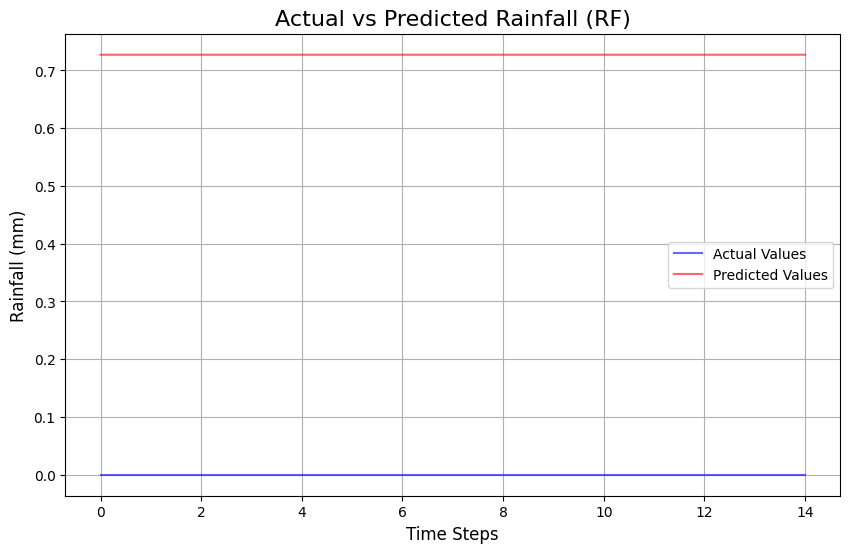

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0955 - val_loss: 3.7192e-05
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0874 - val_loss: 0.0015
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0808 - val_loss: 0.0078
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0763 - val_loss: 0.0200
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0746 - val_loss: 0.0369
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0763 - val_loss: 0.0468
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0783 - val_loss: 0.0464
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0782 - val_loss: 0.0404
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0769 - val_loss: 0.0326
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0756 - val_loss: 0.0254
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0748 - val_loss: 0.0196
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0745 - val_loss: 0.0154

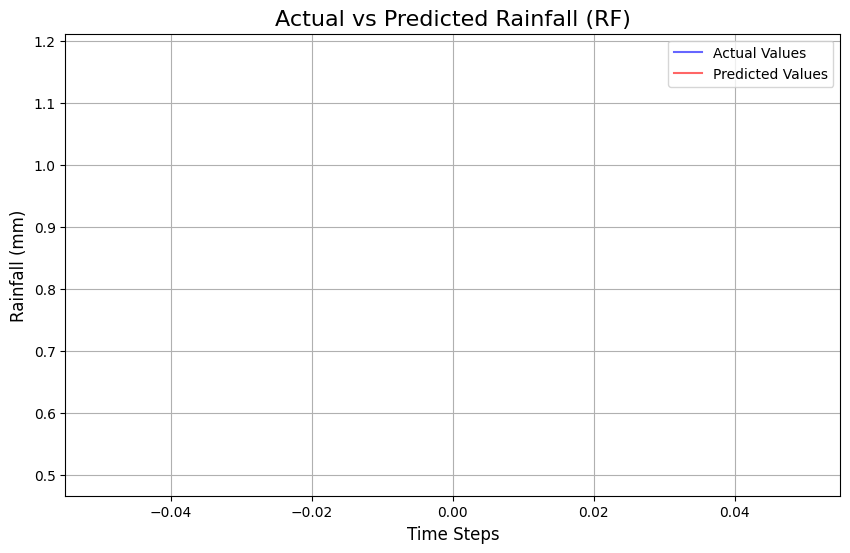

Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0090 - val_loss: 3.7310e-04
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - val_loss: 3.2773e-04
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - val_loss: 5.6870e-04
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0101 - val_loss: 3.2050e-04
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - val_loss: 6.1171e-04
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - val_loss: 4.3117e-04
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0088 - val_loss: 4.2694e-04
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0070 - val_loss: 1.7548e-04
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - val_loss: 5.3132e-04
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102 - val_loss: 8.0679e-04
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss

/home/gaurav/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gaurav/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


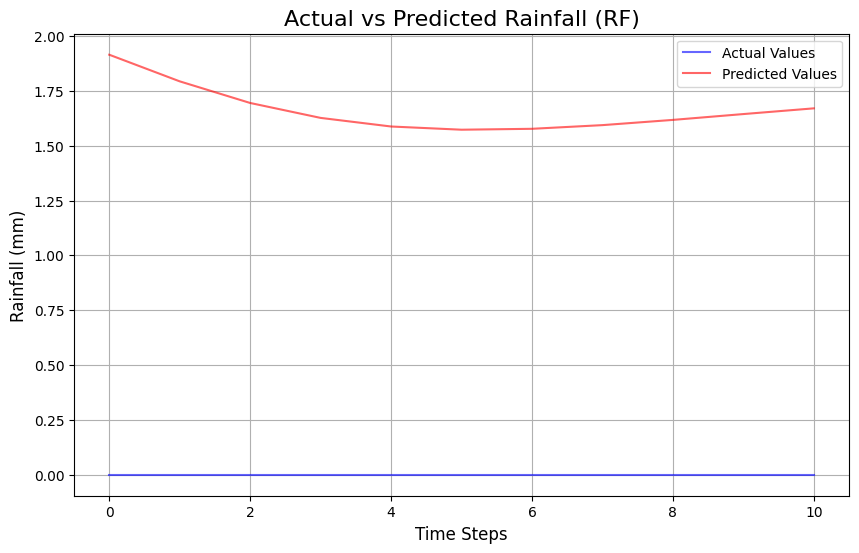

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0409 - val_loss: 0.0042
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0324 - val_loss: 0.0045
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0267 - val_loss: 0.0036
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0327 - val_loss: 0.0036
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0242 - val_loss: 0.0036
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0229 - val_loss: 0.0037
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0264 - val_loss: 0.0039
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0309 - val_loss: 0.0040
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0241 - val_loss: 0.0039
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0298 - val_loss: 0.0041
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0275 - val_loss: 0.0046
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0204 - val_loss: 0.0047


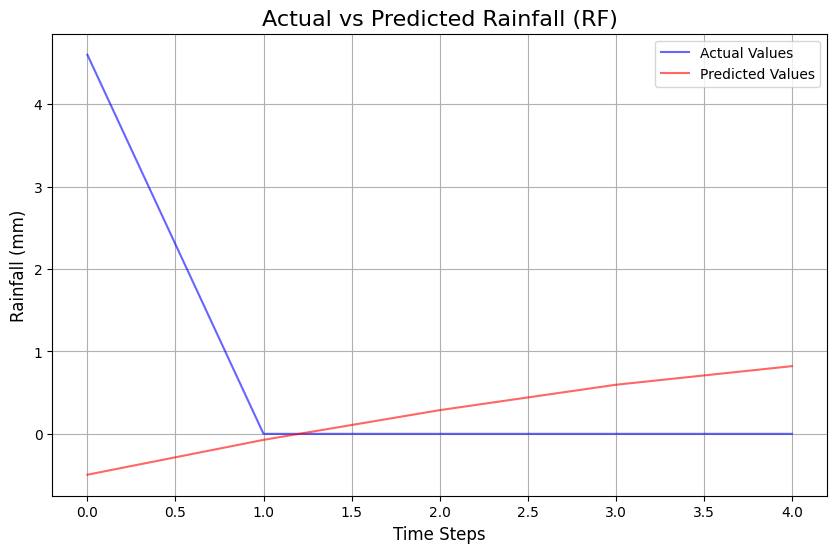

Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0168 - val_loss: 0.0018
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - val_loss: 0.0028
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0166 - val_loss: 0.0018
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0165 - val_loss: 0.0026
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0097 - val_loss: 0.0018
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - val_loss: 0.0021
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0152 - val_loss: 0.0018
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0164 - val_loss: 0.0021
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0089 - val_loss: 0.0020
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0115 - val_loss: 0.0021
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091 - val_l

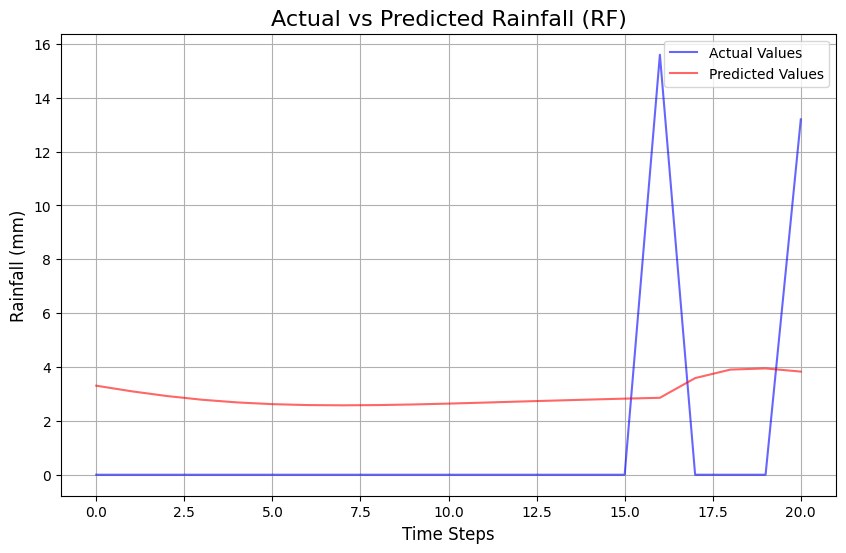

Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0059 - val_loss: 0.0071
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - val_loss: 0.0069
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - val_loss: 0.0070
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0121 - val_loss: 0.0069
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - val_loss: 0.0069
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080 - val_l

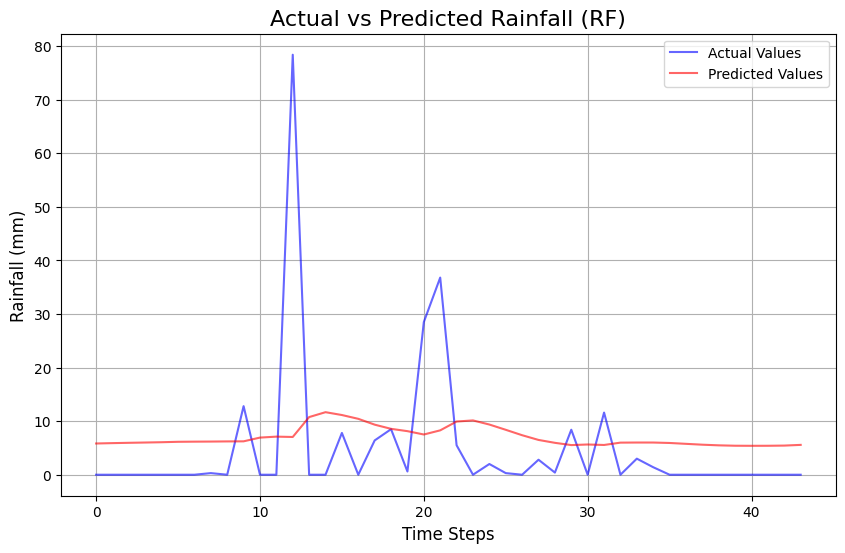

Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0044 - val_loss: 4.6932e-04
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - val_loss: 9.5301e-05
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0079 - val_loss: 8.0155e-04
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - val_loss: 9.1099e-05
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - val_loss: 4.9989e-04
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077 - val_loss: 2.8517e-04
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0094 - val_loss: 4.3916e-04
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - val_loss: 3.0007e-04
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - val_loss: 3.6161e-04
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - val_loss: 2.3445e-04
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - val_loss: 2.3305e-04
Epoch 12/20
12/12 ━━━━━━━━━━━━

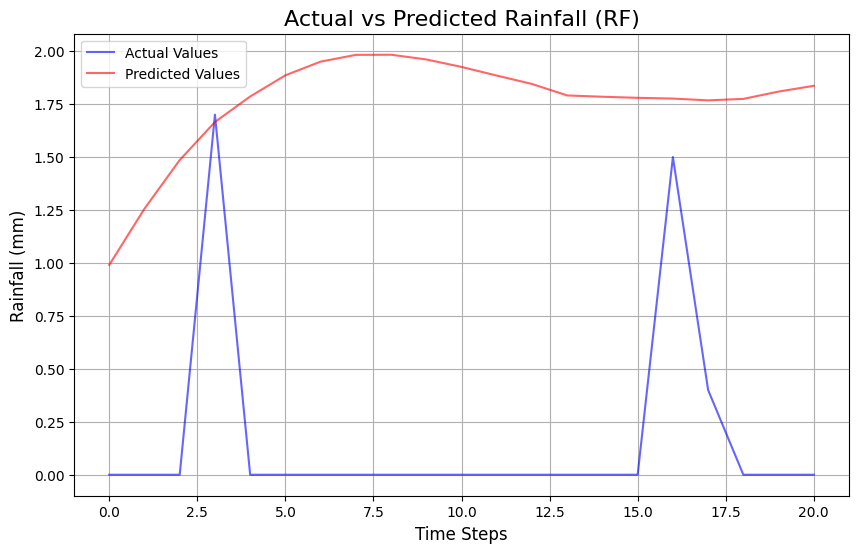

Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0178 - val_loss: 3.8159e-05
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - val_loss: 6.3127e-04
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0074 - val_loss: 8.2227e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - val_loss: 1.6956e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - val_loss: 9.1020e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072 - val_loss: 2.7344e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - val_loss: 5.8003e-04
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0084 - val_loss: 4.7386e-04
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - val_loss: 4.1122e-04
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - val_loss: 6.2568e-04
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - val_loss: 6.5696e-04
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - 

/home/gaurav/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gaurav/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


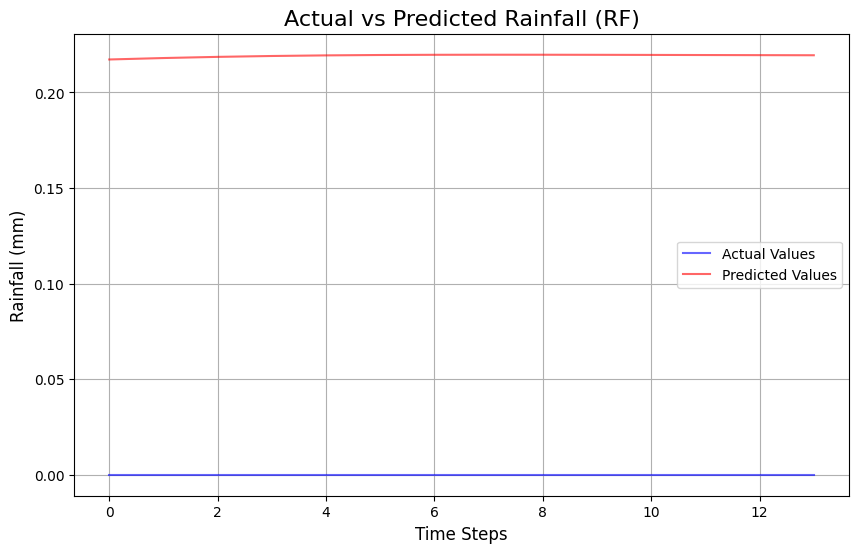

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0212 - val_loss: 0.0343
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0188 - val_loss: 0.0274
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0197 - val_loss: 0.0255
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0165 - val_loss: 0.0285
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - val_loss: 0.0264
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0187 - val_loss: 0.0262
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0139 - val_loss: 0.0253
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - val_loss: 0.0260
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - val_loss: 0.0260
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0152 - val_loss: 0.0254
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0158 - val_loss: 0.0256
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0

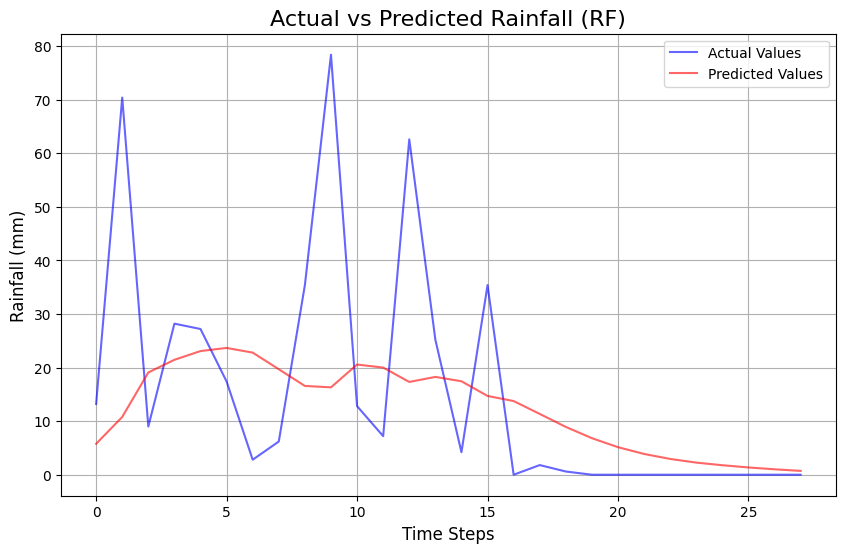

Epoch 1/20


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0020 - val_loss: 0.0081
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0078 - val_loss: 0.0094
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031 - val_loss: 0.0084
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057 - val_loss: 0.0088
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0039 - val_loss: 0.0088
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0023 - val_loss: 0.0085
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0050 - val_loss: 0.0086
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032 - val_loss: 0.0088
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0028 - val_loss: 0.0085
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023 - val_loss: 0.0087
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033 - val_loss: 0.0085
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0016 - val_loss: 0.0089
Epoch 13/20


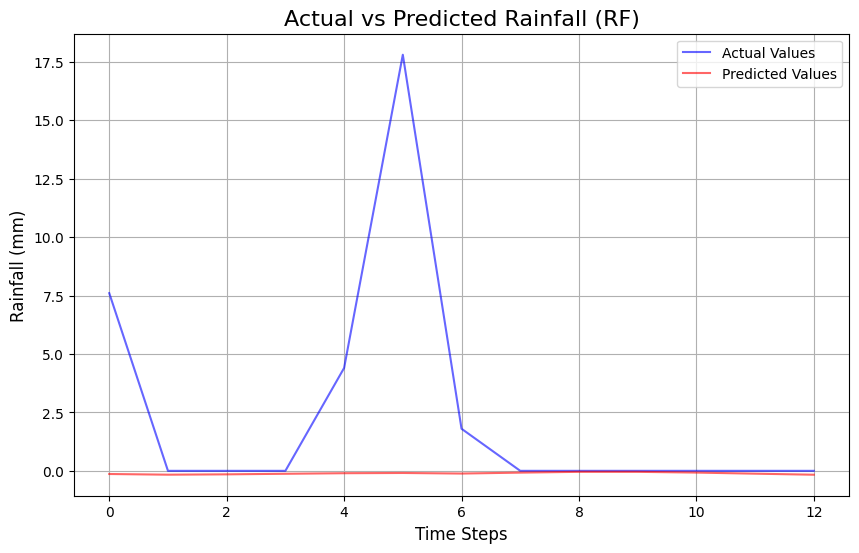

ValueError: With n_samples=0, test_size=0.05 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create sequences for LSTM
def create_sequences(data, time_steps):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i: i + time_steps])
        labels.append(data[i + time_steps])
    return np.array(sequences), np.array(labels)

# Prepare the dataset for LSTM
def prepare_data(df, time_steps=30, test_size=0.05):
    # Extract only 'RF' column (Rainfall data)
    rf_data = df[['RF']].values
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    rf_data_scaled = scaler.fit_transform(rf_data)
    
    # Create sequences for LSTM
    X, y = create_sequences(rf_data_scaled, time_steps)
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    return X_train, y_train, X_test, y_test, scaler

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer for RF prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Process a single file
def process_single_file(file_path, time_steps=30, test_size=0.05):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Prepare the data (5% as test, 30 time-steps)
    X_train, y_train, X_test, y_test, scaler = prepare_data(df, time_steps, test_size)
    
    # Build the LSTM model
    model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    
    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Inverse transform the predictions and actual data to the original scale
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate Mean Squared Error
    mse = np.mean((predictions_rescaled - y_test_rescaled)**2)
    
    # Calculate percentage error, avoiding division by zero
    non_zero_indices = y_test_rescaled != 0
    if len(non_zero_indices) > 0:
        percentage_errors = np.abs((y_test_rescaled[non_zero_indices] - predictions_rescaled[non_zero_indices]) / y_test_rescaled[non_zero_indices]) * 100
        mean_percentage_error = np.mean(percentage_errors)
    else:
        mean_percentage_error = np.nan  # Handle case where all values are zero
    
    # Print results
    print(f"File: {file_path}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
    
    # Plot Actual vs Predicted
    plot_actual_vs_predicted(y_test_rescaled, predictions_rescaled)

# Function to plot Actual vs Predicted values
def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label="Actual Values", color='blue', alpha=0.6)
    plt.plot(predicted, label="Predicted Values", color='red', alpha=0.6)
    plt.title('Actual vs Predicted Rainfall (RF)', fontsize=16)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Loop through all CSV files in the current directory
def process_all_files_in_directory(directory_path='.', time_steps=30, test_size=0.05):
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory_path, file_name)
            process_single_file(file_path, time_steps, test_size)

# Main entry point
if __name__ == "__main__":
    process_all_files_in_directory(directory_path='.')  # Current directory


In [32]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Function to create sequences for LSTM
def create_sequences(data, labels, time_steps):
    sequences = []
    label_seq = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i: i + time_steps])
        label_seq.append(labels[i + time_steps])  # Corresponding label
    return np.array(sequences), np.array(label_seq)

# Prepare the dataset for LSTM (Binary classification: rain or no rain)
def prepare_data(df, time_steps=30, test_size=0.05):
    # Extract only 'RF' column (Rainfall data)
    if 'RF' not in df.columns or df.empty:
        return None, None, None, None, None  # Return None for invalid files
    
    rf_data = df[['RF']].values
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    rf_data_scaled = scaler.fit_transform(rf_data)
    
    # Create binary labels: 1 if RF > 0, else 0
    binary_labels = (df['RF'] > 0).astype(int).values
    
    # Create sequences for LSTM
    X, y = create_sequences(rf_data_scaled, binary_labels, time_steps)
    
    # Split into training and test sets
    if len(X) == 0 or len(y) == 0:
        return None, None, None, None, None  # Return None for invalid data
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    return X_train, y_train, X_test, y_test, scaler

# Build LSTM model for binary classification
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (sigmoid)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to process and evaluate a single file
def process_single_file(file_path, time_steps=30, test_size=0.05):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Prepare the data (5% as test, 30 time-steps)
    X_train, y_train, X_test, y_test, scaler = prepare_data(df, time_steps, test_size)
    
    # Skip if the data is invalid
    if X_train is None or X_test is None:
        return None  # Skip this file if data is invalid
    
    # Build the LSTM model
    model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    
    # Implement Early Stopping to stop when validation loss increases
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model with early stopping
    model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])
    
    # Predict on the test set
    predictions = (model.predict(X_test) > 0.5).astype(int)  # Threshold of 0.5 for binary output
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    # Return results for this file
    return [file_path, accuracy, precision, f1]

# Loop through all CSV files in the current directory and store metrics
def process_all_files_in_directory(directory_path='.', time_steps=30, test_size=0.05):
    results = []
    invalid_files = []  # To track files with no valid data
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory_path, file_name)
            result = process_single_file(file_path, time_steps, test_size)
            if result is None:
                invalid_files.append(file_name)  # Add invalid files to the list
            else:
                results.append(result)
    
    # Convert the results into a DataFrame and display
    if results:
        results_df = pd.DataFrame(results, columns=['File', 'Accuracy', 'Precision', 'F1 Score'])
        print("\nEvaluation Metrics for Each File:")
        print(results_df)
    else:
        print("No valid data found for training in any files.")

    # Log invalid files
    if invalid_files:
        print("\nFiles with invalid data (no RF column or empty):")
        print(invalid_files)

    return results, invalid_files

# Main entry point
if __name__ == "__main__":
    results_df, invalid_files = process_all_files_in_directory(directory_path='.')  # Current directory


Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7301 - loss: 0.6639 - val_accuracy: 1.0000 - val_loss: 0.4770
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9779 - loss: 0.3767 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9533 - loss: 0.2051 - val_accuracy: 1.0000 - val_loss: 0.0468
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9523 - loss: 0.1933 - val_accuracy: 1.0000 - val_loss: 0.0632
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9429 - loss: 0.2179 - val_accuracy: 1.0000 - val_loss: 0.0470
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9626 - loss: 0.1629 - val_accuracy: 1.0000 - val_loss: 0.0330
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9555 - loss: 0.1839 - val_accuracy: 1.0000 - val_loss: 0.0456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 1.0000 - val_loss: 0.6732
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6667 - loss: 0.6884 - val_accuracy: 1.0000 - val_loss: 0.6537
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6667 - loss: 0.6835 - val_accuracy: 1.0000 - val_loss: 0.6326
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6667 - loss: 0.6780 - val_accuracy: 1.0000 - val_loss: 0.6088
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 0.6718 - val_accuracy: 1.0000 - val_loss: 0.5812
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6667 - loss: 0.6650 - val_accuracy: 1.0000 - val_loss: 0.5486
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6667 - loss: 0.6575 - val_accuracy: 1.0000 - val_loss: 0.5097
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6667 - loss: 0.6498 - val_accuracy: 1.0000 - val_loss: 0.4631
Epoch 9/50
1/

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6521 - loss: 0.6798 - val_accuracy: 1.0000 - val_loss: 0.5714
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7616 - loss: 0.6030 - val_accuracy: 1.0000 - val_loss: 0.2069
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7939 - loss: 0.5341 - val_accuracy: 1.0000 - val_loss: 0.2360
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7805 - loss: 0.5389 - val_accuracy: 1.0000 - val_loss: 0.4221
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7807 - loss: 0.5661 - val_accuracy: 1.0000 - val_loss: 0.4637
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7785 - loss: 0.5740 - val_accuracy: 1.0000 - val_loss: 0.3997
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7947 - loss: 0.5374 - val_accuracy: 1.0000 - val_loss: 0.2714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.7723 - loss: 0.6861 - val_accuracy: 0.8000 - val_loss: 0.6617
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7489 - loss: 0.6598 - val_accuracy: 0.8000 - val_loss: 0.6175
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7450 - loss: 0.6267 - val_accuracy: 0.8000 - val_loss: 0.5499
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7372 - loss: 0.5809 - val_accuracy: 0.8000 - val_loss: 0.5137
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7411 - loss: 0.5770 - val_accuracy: 0.8000 - val_loss: 0.5480
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7606 - loss: 0.5557 - val_accuracy: 0.8000 - val_loss: 0.5237
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7802 - loss: 0.5279 - val_accuracy: 0.8000 - val_loss: 0.5093
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7489 - loss: 0.5678 - val_accuracy: 0.8000 - val_loss: 0.5157
Epoch 9/50

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5998 - loss: 0.6754 - val_accuracy: 0.9048 - val_loss: 0.4339
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7307 - loss: 0.5897 - val_accuracy: 0.9048 - val_loss: 0.4564
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7560 - loss: 0.5664 - val_accuracy: 0.9048 - val_loss: 0.4447
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6984 - loss: 0.6147 - val_accuracy: 0.9048 - val_loss: 0.4597
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7179 - loss: 0.5953 - val_accuracy: 0.9048 - val_loss: 0.3911
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7032 - loss: 0.6177 - val_accuracy: 0.9048 - val_loss: 0.4333
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6987 - loss: 0.6114 - val_accuracy: 0.9048 - val_loss: 0.4633
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7014 - loss: 0.6083 - val_accuracy: 0.9048 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6626 - loss: 0.6650 - val_accuracy: 0.5909 - val_loss: 0.6837
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7042 - loss: 0.6082 - val_accuracy: 0.5909 - val_loss: 0.7181
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7390 - loss: 0.5646 - val_accuracy: 0.5909 - val_loss: 0.6546
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7147 - loss: 0.5836 - val_accuracy: 0.5909 - val_loss: 0.6160
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7161 - loss: 0.5519 - val_accuracy: 0.6818 - val_loss: 0.5888
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7376 - loss: 0.5331 - val_accuracy: 0.7500 - val_loss: 0.5832
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7220 - loss: 0.5411 - val_accuracy: 0.7045 - val_loss: 0.5576
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6977 - loss: 0.5591 - val_accuracy: 0.7045 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8329 - loss: 0.6662 - val_accuracy: 0.8571 - val_loss: 0.4802
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8006 - loss: 0.5016 - val_accuracy: 0.8571 - val_loss: 0.4078
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8183 - loss: 0.4780 - val_accuracy: 0.8571 - val_loss: 0.4210
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8091 - loss: 0.4895 - val_accuracy: 0.8571 - val_loss: 0.4081
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7990 - loss: 0.5146 - val_accuracy: 0.8571 - val_loss: 0.4109
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7981 - loss: 0.5074 - val_accuracy: 0.8571 - val_loss: 0.4115
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8463 - loss: 0.4365 - val_accuracy: 0.8571 - val_loss: 0.4133
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7137 - loss: 0.6726 - val_accuracy: 1.0000 - val_loss: 0.5607
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9243 - loss: 0.4996 - val_accuracy: 1.0000 - val_loss: 0.0597
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9490 - loss: 0.2609 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9301 - loss: 0.2787 - val_accuracy: 1.0000 - val_loss: 0.1299
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9467 - loss: 0.2310 - val_accuracy: 1.0000 - val_loss: 0.0890
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9312 - loss: 0.2519 - val_accuracy: 1.0000 - val_loss: 0.0611
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9521 - loss: 0.1959 - val_accuracy: 1.0000 - val_loss: 0.0537
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9179 - loss: 0.2931 - val_accuracy: 1.0000 - val_loss: 0.0806
1/1 ━━━━━━━

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5736 - loss: 0.6752 - val_accuracy: 0.3571 - val_loss: 0.8320
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6272 - loss: 0.6064 - val_accuracy: 0.8214 - val_loss: 0.5238
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8194 - loss: 0.4255 - val_accuracy: 0.8929 - val_loss: 0.4754
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7976 - loss: 0.4769 - val_accuracy: 0.8571 - val_loss: 0.3847
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8129 - loss: 0.3892 - val_accuracy: 0.8929 - val_loss: 0.3309
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8348 - loss: 0.3826 - val_accuracy: 0.8929 - val_loss: 0.4764
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8123 - loss: 0.4142 - val_accuracy: 0.8571 - val_loss: 0.3926
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8210 - loss: 0.4093 - val_accuracy: 0.8929 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7681 - loss: 0.6730 - val_accuracy: 0.6923 - val_loss: 0.6265
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7965 - loss: 0.5240 - val_accuracy: 0.6923 - val_loss: 0.8672
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8302 - loss: 0.4847 - val_accuracy: 0.6923 - val_loss: 0.6288
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8077 - loss: 0.4988 - val_accuracy: 0.6923 - val_loss: 0.6416
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8563 - loss: 0.4260 - val_accuracy: 0.6923 - val_loss: 0.6941
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8422 - loss: 0.4325 - val_accuracy: 0.6923 - val_loss: 0.6274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7843 - loss: 0.6663 - val_accuracy: 0.6111 - val_loss: 0.7065
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7898 - loss: 0.5307 - val_accuracy: 0.6111 - val_loss: 0.7068
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7915 - loss: 0.5308 - val_accuracy: 0.6111 - val_loss: 0.6990
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7764 - loss: 0.5382 - val_accuracy: 0.6111 - val_loss: 0.7885
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7621 - loss: 0.5480 - val_accuracy: 0.6111 - val_loss: 0.7286
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7482 - loss: 0.5559 - val_accuracy: 0.6111 - val_loss: 0.7582
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7561 - loss: 0.5519 - val_accuracy: 0.6111 - val_loss: 0.7579
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7625 - loss: 0.5433 - val_accuracy: 0.6111 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5334 - loss: 0.6867 - val_accuracy: 0.8333 - val_loss: 0.6429
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8079 - loss: 0.6391 - val_accuracy: 0.8333 - val_loss: 0.5610
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8131 - loss: 0.5615 - val_accuracy: 0.8333 - val_loss: 0.4507
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8037 - loss: 0.5095 - val_accuracy: 0.8333 - val_loss: 0.4868
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8287 - loss: 0.5006 - val_accuracy: 0.8333 - val_loss: 0.4525
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8266 - loss: 0.4617 - val_accuracy: 0.8333 - val_loss: 0.4624
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8245 - loss: 0.4852 - val_accuracy: 0.8333 - val_loss: 0.4838
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8266 - loss: 0.4979 - val_accuracy: 0.8333 - val_loss: 0.4830
1/1 ━━━━━━

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5470 - loss: 0.6849 - val_accuracy: 0.7895 - val_loss: 0.5777
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5906 - loss: 0.6707 - val_accuracy: 0.7895 - val_loss: 0.5386
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6469 - loss: 0.6282 - val_accuracy: 0.7895 - val_loss: 0.6163
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6306 - loss: 0.6010 - val_accuracy: 0.4737 - val_loss: 0.6990
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6902 - loss: 0.5823 - val_accuracy: 0.4737 - val_loss: 0.6776
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7467 - loss: 0.5485 - val_accuracy: 0.3684 - val_loss: 0.7835
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6876 - loss: 0.5787 - val_accuracy: 0.7368 - val_loss: 0.5767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8437 - loss: 0.6744 - val_accuracy: 1.0000 - val_loss: 0.5123
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8298 - loss: 0.5307 - val_accuracy: 1.0000 - val_loss: 0.0820
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8226 - loss: 0.4882 - val_accuracy: 1.0000 - val_loss: 0.2642
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8128 - loss: 0.4837 - val_accuracy: 1.0000 - val_loss: 0.2004
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8474 - loss: 0.4336 - val_accuracy: 1.0000 - val_loss: 0.1567
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8334 - loss: 0.4441 - val_accuracy: 1.0000 - val_loss: 0.2214
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8096 - loss: 0.4811 - val_accuracy: 1.0000 - val_loss: 0.1805
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.8204 - loss: 0.6900 - val_accuracy: 0.6667 - val_loss: 0.6856
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8175 - loss: 0.6758 - val_accuracy: 0.6667 - val_loss: 0.6773
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8175 - loss: 0.6587 - val_accuracy: 0.6667 - val_loss: 0.6665
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8383 - loss: 0.6326 - val_accuracy: 0.6667 - val_loss: 0.6527
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8175 - loss: 0.6004 - val_accuracy: 0.6667 - val_loss: 0.6405
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7967 - loss: 0.5598 - val_accuracy: 0.6667 - val_loss: 0.6537
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8071 - loss: 0.5011 - val_accuracy: 0.6667 - val_loss: 0.7590
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7967 - loss: 0.4964 - val_accuracy: 0.6667 - val_loss: 0.9314
Epoch 9/50

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8233 - loss: 0.6525 - val_accuracy: 0.8182 - val_loss: 0.4799
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8576 - loss: 0.4245 - val_accuracy: 0.8182 - val_loss: 0.4769
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8268 - loss: 0.4721 - val_accuracy: 0.8182 - val_loss: 0.4822
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8262 - loss: 0.4580 - val_accuracy: 0.8182 - val_loss: 0.5090
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8513 - loss: 0.4194 - val_accuracy: 0.8182 - val_loss: 0.4907
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8447 - loss: 0.4299 - val_accuracy: 0.8182 - val_loss: 0.4921
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8859 - loss: 0.3640 - val_accuracy: 0.8182 - val_loss: 0.4833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8095 - loss: 0.6361 - val_accuracy: 0.7857 - val_loss: 0.5600
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8565 - loss: 0.4101 - val_accuracy: 0.7857 - val_loss: 0.5251
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8393 - loss: 0.4492 - val_accuracy: 0.7857 - val_loss: 0.5322
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8228 - loss: 0.4644 - val_accuracy: 0.7857 - val_loss: 0.5157
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8535 - loss: 0.4037 - val_accuracy: 0.7857 - val_loss: 0.5181
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8288 - loss: 0.4532 - val_accuracy: 0.7857 - val_loss: 0.5213
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8481 - loss: 0.4213 - val_accuracy: 0.7857 - val_loss: 0.5245
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8439 - loss: 0.4375 - val_accuracy: 0.7857 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6760 - loss: 0.6596 - val_accuracy: 0.6818 - val_loss: 0.6320
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8272 - loss: 0.4671 - val_accuracy: 0.6818 - val_loss: 0.6600
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8388 - loss: 0.4463 - val_accuracy: 0.6818 - val_loss: 0.6764
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8279 - loss: 0.4586 - val_accuracy: 0.6818 - val_loss: 0.6682
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8296 - loss: 0.4523 - val_accuracy: 0.6818 - val_loss: 0.6532
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8164 - loss: 0.4697 - val_accuracy: 0.6818 - val_loss: 0.6622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8017 - loss: 0.6395 - val_accuracy: 0.8696 - val_loss: 0.4065
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8370 - loss: 0.4662 - val_accuracy: 0.8696 - val_loss: 0.4372
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8296 - loss: 0.4759 - val_accuracy: 0.8696 - val_loss: 0.3793
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8386 - loss: 0.4375 - val_accuracy: 0.8696 - val_loss: 0.3947
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8180 - loss: 0.4729 - val_accuracy: 0.8696 - val_loss: 0.3772
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8090 - loss: 0.4811 - val_accuracy: 0.8696 - val_loss: 0.3742
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8243 - loss: 0.4515 - val_accuracy: 0.8696 - val_loss: 0.3618
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8433 - loss: 0.4168 - val_accuracy: 0.8696 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8239 - loss: 0.6792 - val_accuracy: 1.0000 - val_loss: 0.5755
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8810 - loss: 0.5817 - val_accuracy: 1.0000 - val_loss: 0.3231
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9048 - loss: 0.3901 - val_accuracy: 1.0000 - val_loss: 0.0491
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8953 - loss: 0.3563 - val_accuracy: 1.0000 - val_loss: 0.0900
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8783 - loss: 0.3767 - val_accuracy: 1.0000 - val_loss: 0.1675
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8966 - loss: 0.3462 - val_accuracy: 1.0000 - val_loss: 0.1386
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8718 - loss: 0.3815 - val_accuracy: 1.0000 - val_loss: 0.1126
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9053 - loss: 0.3165 - val_accuracy: 1.0000 - val_loss: 0.0867
1/1 ━━━━━━

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7861 - loss: 0.6506 - val_accuracy: 0.8750 - val_loss: 0.3802
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8572 - loss: 0.4392 - val_accuracy: 0.8750 - val_loss: 0.4452
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8214 - loss: 0.4867 - val_accuracy: 0.8750 - val_loss: 0.3823
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8339 - loss: 0.4498 - val_accuracy: 0.8750 - val_loss: 0.3867
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8227 - loss: 0.4671 - val_accuracy: 0.8750 - val_loss: 0.3806
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8257 - loss: 0.4654 - val_accuracy: 0.8750 - val_loss: 0.3840
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7838 - loss: 0.6048 - val_accuracy: 0.9756 - val_loss: 0.1920
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8783 - loss: 0.3726 - val_accuracy: 0.9756 - val_loss: 0.2043
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8722 - loss: 0.3839 - val_accuracy: 0.9756 - val_loss: 0.2228
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8616 - loss: 0.4022 - val_accuracy: 0.9756 - val_loss: 0.1938
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8651 - loss: 0.3965 - val_accuracy: 0.9756 - val_loss: 0.1585
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8702 - loss: 0.3922 - val_accuracy: 0.9756 - val_loss: 0.1944
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8727 - loss: 0.3816 - val_accuracy: 0.9756 - val_loss: 0.1491
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8672 - loss: 0.4021 - val_accuracy: 0.9756 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8762 - loss: 0.6410 - val_accuracy: 0.8696 - val_loss: 0.3904
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8961 - loss: 0.3430 - val_accuracy: 0.8696 - val_loss: 0.3949
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8712 - loss: 0.4183 - val_accuracy: 0.8696 - val_loss: 0.3955
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8762 - loss: 0.3792 - val_accuracy: 0.8696 - val_loss: 0.3956
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8888 - loss: 0.3525 - val_accuracy: 0.8696 - val_loss: 0.3876
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8682 - loss: 0.3916 - val_accuracy: 0.8696 - val_loss: 0.3881
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8733 - loss: 0.3842 - val_accuracy: 0.8696 - val_loss: 0.3869
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8721 - loss: 0.3827 - val_accuracy: 0.8696 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.5828 - loss: 0.6811 - val_accuracy: 0.4000 - val_loss: 0.7229
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8061 - loss: 0.6019 - val_accuracy: 0.4000 - val_loss: 1.0202
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8187 - loss: 0.4927 - val_accuracy: 0.4000 - val_loss: 1.3502
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7780 - loss: 0.5621 - val_accuracy: 0.4000 - val_loss: 1.0369
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8323 - loss: 0.4604 - val_accuracy: 0.4000 - val_loss: 1.0880
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8049 - loss: 0.4928 - val_accuracy: 0.4000 - val_loss: 1.0966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5843 - loss: 0.6834 - val_accuracy: 0.7407 - val_loss: 0.5743
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6342 - loss: 0.6525 - val_accuracy: 0.7407 - val_loss: 0.5890
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5928 - loss: 0.6693 - val_accuracy: 0.7407 - val_loss: 0.5380
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6048 - loss: 0.6498 - val_accuracy: 0.8148 - val_loss: 0.4109
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6562 - loss: 0.6229 - val_accuracy: 0.8148 - val_loss: 0.3556
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6442 - loss: 0.7011 - val_accuracy: 0.8148 - val_loss: 0.5018
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6514 - loss: 0.6344 - val_accuracy: 0.8519 - val_loss: 0.3567
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6950 - loss: 0.5895 - val_accuracy: 0.8148 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7103 - loss: 0.6467 - val_accuracy: 0.8824 - val_loss: 0.4251
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8893 - loss: 0.3787 - val_accuracy: 0.8824 - val_loss: 0.3633
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9174 - loss: 0.2836 - val_accuracy: 0.8824 - val_loss: 0.3662
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8946 - loss: 0.3390 - val_accuracy: 0.8824 - val_loss: 0.3620
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8891 - loss: 0.3468 - val_accuracy: 0.8824 - val_loss: 0.3620
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8856 - loss: 0.3523 - val_accuracy: 0.8824 - val_loss: 0.3624
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8809 - loss: 0.3651 - val_accuracy: 0.8824 - val_loss: 0.3643
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8841 - loss: 0.3511 - val_accuracy: 0.8824 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.7736 - loss: 0.6907 - val_accuracy: 1.0000 - val_loss: 0.6720
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9785 - loss: 0.6679 - val_accuracy: 1.0000 - val_loss: 0.6446
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9785 - loss: 0.6387 - val_accuracy: 1.0000 - val_loss: 0.6055
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9889 - loss: 0.5955 - val_accuracy: 1.0000 - val_loss: 0.5464
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9785 - loss: 0.5336 - val_accuracy: 1.0000 - val_loss: 0.4543
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9785 - loss: 0.4356 - val_accuracy: 1.0000 - val_loss: 0.3136
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9785 - loss: 0.2942 - val_accuracy: 1.0000 - val_loss: 0.1364
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9785 - loss: 0.1472 - val_accuracy: 1.0000 - val_loss: 0.0257
Epoch 9/50

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.7311 - loss: 0.6859 - val_accuracy: 1.0000 - val_loss: 0.6445
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9775 - loss: 0.6321 - val_accuracy: 1.0000 - val_loss: 0.5471
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9639 - loss: 0.5250 - val_accuracy: 1.0000 - val_loss: 0.3293
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9660 - loss: 0.3040 - val_accuracy: 1.0000 - val_loss: 0.0459
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9671 - loss: 0.1570 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9608 - loss: 0.2063 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9702 - loss: 0.1523 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9483 - loss: 0.2397 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 9/50

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9061 - loss: 0.6694 - val_accuracy: 1.0000 - val_loss: 0.5356
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9672 - loss: 0.4581 - val_accuracy: 1.0000 - val_loss: 0.0369
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9858 - loss: 0.0974 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9646 - loss: 0.2261 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9658 - loss: 0.1718 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9623 - loss: 0.1663 - val_accuracy: 1.0000 - val_loss: 0.0320
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9707 - loss: 0.1322 - val_accuracy: 1.0000 - val_loss: 0.0304
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9838 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0224
1/1 ━━━━━━━

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6377 - loss: 0.6765 - val_accuracy: 1.0000 - val_loss: 0.5460
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8264 - loss: 0.5484 - val_accuracy: 1.0000 - val_loss: 0.1493
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8214 - loss: 0.4740 - val_accuracy: 1.0000 - val_loss: 0.2745
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8068 - loss: 0.4884 - val_accuracy: 1.0000 - val_loss: 0.1954
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8145 - loss: 0.4848 - val_accuracy: 1.0000 - val_loss: 0.1966
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7841 - loss: 0.5246 - val_accuracy: 1.0000 - val_loss: 0.2251
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8292 - loss: 0.4555 - val_accuracy: 1.0000 - val_loss: 0.1843
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8880 - loss: 0.6346 - val_accuracy: 0.7308 - val_loss: 0.7700
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8963 - loss: 0.3514 - val_accuracy: 0.7308 - val_loss: 0.6159
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8855 - loss: 0.3575 - val_accuracy: 0.7308 - val_loss: 0.7380
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9004 - loss: 0.3299 - val_accuracy: 0.7308 - val_loss: 0.6459
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8868 - loss: 0.3532 - val_accuracy: 0.7308 - val_loss: 0.7049
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8771 - loss: 0.3774 - val_accuracy: 0.7308 - val_loss: 0.6947
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8794 - loss: 0.3720 - val_accuracy: 0.7308 - val_loss: 0.6791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Epoch 1/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.7919 - loss: 0.6630 - val_accuracy: 0.6087 - val_loss: 0.7213
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7562 - loss: 0.5483 - val_accuracy: 0.6087 - val_loss: 0.7454
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7352 - loss: 0.5764 - val_accuracy: 0.6087 - val_loss: 0.7476
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7518 - loss: 0.5492 - val_accuracy: 0.6087 - val_loss: 0.7173
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7666 - loss: 0.5249 - val_accuracy: 0.6087 - val_loss: 0.7246
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7710 - loss: 0.5141 - val_accuracy: 0.6087 - val_loss: 0.6830
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7641 - loss: 0.5058 - val_accuracy: 0.6087 - val_loss: 0.6586
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7736 - loss: 0.5071 - val_accuracy: 0.6087 - val_loss: 0.

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5172 - loss: 0.6831 - val_accuracy: 0.9231 - val_loss: 0.5848
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7382 - loss: 0.6065 - val_accuracy: 0.9231 - val_loss: 0.3135
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7390 - loss: 0.5553 - val_accuracy: 0.9231 - val_loss: 0.4205
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7555 - loss: 0.5361 - val_accuracy: 0.9231 - val_loss: 0.3373
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7230 - loss: 0.5351 - val_accuracy: 0.9231 - val_loss: 0.2938
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7260 - loss: 0.5137 - val_accuracy: 0.9231 - val_loss: 0.3106
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7564 - loss: 0.5111 - val_accuracy: 0.9231 - val_loss: 0.3008
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7300 - loss: 0.4771 - val_accuracy: 0.9231 - val_loss: 0.3583
Epoch 9/50


/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7375 - loss: 0.6870 - val_accuracy: 0.7143 - val_loss: 0.6627
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7659 - loss: 0.6479 - val_accuracy: 0.7143 - val_loss: 0.6219
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7190 - loss: 0.6056 - val_accuracy: 0.7143 - val_loss: 0.6123
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7336 - loss: 0.5838 - val_accuracy: 0.7143 - val_loss: 0.6479
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7440 - loss: 0.5704 - val_accuracy: 0.7143 - val_loss: 0.5994
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7451 - loss: 0.5644 - val_accuracy: 0.7143 - val_loss: 0.6011
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7711 - loss: 0.5572 - val_accuracy: 0.7143 - val_loss: 0.6014
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7732 - loss: 0.5553 - val_accuracy: 0.7143 - val_loss: 0.5989
Epoch 9/50

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7249 - loss: 0.6685 - val_accuracy: 1.0000 - val_loss: 0.5310
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9626 - loss: 0.4470 - val_accuracy: 1.0000 - val_loss: 0.0285
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9492 - loss: 0.2201 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9481 - loss: 0.2179 - val_accuracy: 1.0000 - val_loss: 0.0750
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9367 - loss: 0.2396 - val_accuracy: 1.0000 - val_loss: 0.0663
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9616 - loss: 0.1680 - val_accuracy: 1.0000 - val_loss: 0.0318
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9552 - loss: 0.1848 - val_accuracy: 1.0000 - val_loss: 0.0489
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9526 - loss: 0.1906 - val_accuracy: 1.0000 - val_loss: 0.0632
1/1 ━━━━━━━

/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gaurav/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
